# Trabalho #5 - Regularização

Redes neurais deep learning tem tanta flexibilidade e capacidade que o problema de **"overfitting"** se torna muito sério se o conjunto de dados de treinamento não for grande o suficiente. A RNA pode fornecer ótimos resultados para os dados de treinameno, mas não é capaz de **generalizar para novos exemplos nunca vistos**.

**Nesse trabalho você irá usar métodos de regularização para melhorar o desempenho de sua RNA.**

## Coloque os nomes e RAs dos alunos que fizeram esse trabalho

Nome e número dos alunos da equipe:

Aluno 1: Igor Amaral Correa 20.83992-8

Aluno 2: 

## 1 - Bibliotecas

Em primeiro lugar é necessário importar algumas bibliotecas do Python que serão usados nesse trabalho:
- [numpy](www.numpy.org) pacote de cálculo científico com Python
- [sklearn](http://scikit-learn.org/stable/) fornece ferramentes eficientes e simples para análise de dados 
- [matplotlib](http://matplotlib.org) biblioteca para gerar gráficos em Python
- scipy.io fornece funções de entrada e saída

In [0]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from utils import plot_decision_boundary, load_2D_dataset

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 2 - Definição do problema ##

Um time de football quer desenvolver um sistema de IA para recomendar posições onde o goleiro deve chutar a bola para que os jogadores do time possam pegá-la mais facilmente e, assim, iniciar jogadas mais eficientes.

<img src="https://github.com/pigortekids/Notas4/blob/master/T5/field_kiank.png?raw=1" style="width:600px;height:350px;">
<caption><center> <u> **Figure 1** </u>: **Campo de football**<br> O goleiro chuta a bola para frente e os jogadores dos dois times tentam pegá-la (Andrew Ng, deeplearning.ai)</center></caption>

O time fornece o seguinte conjunto de dados, que corresponde às posições onde o goleiro chutou a bola e com qual time ficou a posse da mesma nos últimos 10 jogos.

Esse problema foi criado por Adrew Ng (deeplearning.ai).

Execute a célula abaixo para carregar os dados do problema.

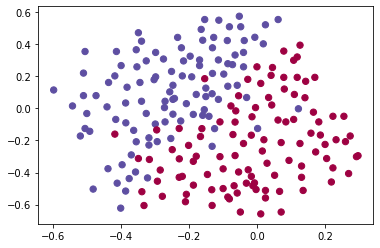

In [2]:
X_train, Y_train, X_test, Y_test, X_val, Y_val = load_2D_dataset()

Na figura acima, cada círculo correponde a uma posição do campo de futeball onde um jogador pegou a bola após o goleiro chutar a mesma a partir do gol do lado esquerdo do campo.

- Círculo azul representa os jogadores do time do goleiro que ficaram com a posse da bola após o chute do goleiro;
- Círculo vermelho representa os jogadores do time adversário que ficaram com a posse da bola após o chute do goleiro.

### Objetivo do trabalho

- Desenvolver uma RNA dep learning para determinar as posições no campo de futebol onde o goleiro do time deve chutar a bola para que um jogador do time fique com a posse da mesma.
- Observe que esse problema é um problema de classificação binária onde se deseja determinar a probabilidade do time do goleiro ficar com a bola se ela cair em uma dada posição do campo.

## 3 - Análise dos dados ##

Esse conjunto de dados apresenta um pouco de ruído, mas parece que uma reta diagonal, vindo de cima para baixo da direita para esquerda, separando a metade superior com bolinhas predominantemente azul da metade inferior com bolinhas predominantemente vermelhas funcionaria bem. 

Vamos calcular a dimensão dos dados para verificar se estão de acordo com que o Keras espera do formato dos dados.



In [3]:
# Calculo das dimensões dos dados de entrada e saída dos conjuntos de treinamento e teste
print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train.shape)
print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_val.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test.shape)

Dimensão dos dados de entrada do conjunto de treinamento:  (2, 211)
Dimensão dos dados de saída do conjunto de treinamento:  (1, 211)
Dimensão dos dados de entrada do conjunto de validação:  (2, 100)
Dimensão dos dados de saída do conjunto de validação:  (1, 100)
Dimensão dos dados de entrada do conjunto de teste:  (2, 100)
Dimensão dos dados de saída do conjunto de teste:  (1, 100)


Pode-se perceber que cada exemplo de treinamento é uma coluna do conjunto de dados. Como o Keras espera que cada exemplo seja uma linha do conjunto de dados, então temos que redimensionar todos os dados.

### Exercício #1: Redimensionamento dos dados

Redimensione os dados de entrada e de saída dos conjuntos de teste e de treinamento de forma que cada exemplo corresponda a uma linha.


In [4]:
# PARA VOCÊ FAZER: Redimensionamento dos dados

### COMECE AQUI ### (≈ 6 linhas)
X_train = X_train.transpose()
Y_train = Y_train.transpose()
X_val = X_val.transpose()
Y_val = Y_val.transpose()
X_test = X_test.transpose()
Y_test = Y_test.transpose()
### TERMINE AQUI ###

print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train.shape)
print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_test.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_test.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test.shape)

Dimensão dos dados de entrada do conjunto de treinamento:  (211, 2)
Dimensão dos dados de saída do conjunto de treinamento:  (211, 1)
Dimensão dos dados de entrada do conjunto de validação:  (100, 2)
Dimensão dos dados de saída do conjunto de validação:  (100, 1)
Dimensão dos dados de entrada do conjunto de teste:  (100, 2)
Dimensão dos dados de saída do conjunto de teste:  (100, 1)


**Saída esperada:**
    
    Dimensão dos dados de entrada do conjunto de treinamento:  (211, 2)
    Dimensão dos dados de saída do conjunto de treinamento:  (211, 1)
    Dimensão dos dados de entrada do conjunto de validação:  (100, 2)
    Dimensão dos dados de saída do conjunto de validação:  (100, 1)
    Dimensão dos dados de entrada do conjunto de teste:  (100, 2)
    Dimensão dos dados de saída do conjunto de teste:  (100, 1)

### Exercício #2: Cálculo de parâmetros estatísiticos dos dados 

Pela visualização dos dados parece que eles já estão adequados para serem usados por uma RNA, porém precisamos verificar se não é necessária alguma operação de normalização. Na célula abaixo calcule a média e desvio padrão dos dados de treinamento para verificar se é necessário fazer alguma operação adicional nos dados.

In [5]:
# PARA VOCÊ FAZER: Cálculo da média e desvio padrão dos dados de treinamento

# Calculo das médias e desvios padrão dos dados de entrada do conjunto de treinamento
### COMECE AQUI ### (≈ 4 linhas)
meanx = X_train.mean(axis=0)
stdx = X_train.std(axis=0)
maxx = X_train.max()
minx = X_train.min()
### TERMINE AQUI ###

print('Média dos dados de entrada do conjunto de treinamento: ', meanx)
print('Desvio padrão dos dados de saída do conjunto de treinamento: ', stdx)
print('Valor máximo dos dados de entrada: ', maxx)
print('Valor mínimo dos dados de entrada: ', minx)

Média dos dados de entrada do conjunto de treinamento:  [-0.13024551 -0.05974335]
Desvio padrão dos dados de saída do conjunto de treinamento:  [0.20004073 0.31400379]
Valor máximo dos dados de entrada:  0.573392
Valor mínimo dos dados de entrada:  -0.657895


**Saída esperada:**

    Média dos dados de entrada do conjunto de treinamento:  [-0.13024551 -0.05974335]
    Desvio padrão dos dados de saída do conjunto de treinamento:  [0.20004073 0.31400379]    
    Valor máximo dos dados de entrada:  0.573392
    Valor mínimo dos dados de entrada:  -0.657895
    
Como pode-se perceber, os dados não estão normalizados, ou seja, não possuem média zero nem desvio padrão igual a um, mas como estão dentro do ontervalo -1 a +1 não é preciso normalizá-los.
    


## 3 - RNA base

Primeiramente você tentará usar uma RNA simples, sem nenhuma forma de regularização, para ajustar os dados. Após isso você vai aprimorar a sua RNA usando regularização para obter bons resultados e resolver o problema do time de football.

### Exercício #3: Criação da RNA

Para resolver esse problema você vai usar uma RNA com 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu;
- Segunda camada: número de neurônios n2, função de ativação ReLu;
- Camada de saída: número de neurônio n3, função de ativação sigmóide.

Como iremos usar essa mesma RNA diversas vezes, na célula abaixo crie uma função que recebe a dimensão dos dados de entrada e os números de neurônios das 3 camadas e configure a RNA de acordo com as características acima.

In [0]:
# PARA VOCÊ FAZER: Função para criação da RNA base

# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(data_shape, n1, n2, n3):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
       
    Retorna: modelo da rede neural
    """
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 3 linhas)
    model.add(layers.Dense(units=n1, activation='relu', input_dim=data_shape[0]))
    model.add(layers.Dense(units=n2, activation='relu'))
    model.add(layers.Dense(units=n3, activation='sigmoid'))
    ### TERMINE AQUI ###
    
    return model

### Exercício #4: Configuração da RNA

Defina os números de neurônios das camadas intermediárias e de saída e crie a RNA usando a função build_model criada na célula anterior. Utilize n1 = 40, n2 = 6, n3 = 1. Após criar a RNA utilize o método summary para visualizar a sua rede.

In [7]:
# PARA VOCÊ FAZER: configuração da RNA base

# Inicializa o gerador de números aleatórios
np.random.seed(43)

# Dimensão dos dados de entrada
data_shape = (2,)

# Definição dos números de neurônios das camadas
#### COMECE AQUI ### (≈ 3 linhas)
n1 = 40
n2 = 6
n3 = 1
### TERMINE AQUI ###

# Cria rede neural deep learning e apresenta sua configuração
#### COMECE AQUI ### (≈ 2 linhas)
rna0 = build_model(data_shape, n1, n2, n3)
rna0.summary()
### TERMINE AQUI ###


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 246       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_1 (Dense)              (None, 40)                120       
    _________________________________________________________________
    dense_2 (Dense)              (None, 6)                 246       
    _________________________________________________________________
    dense_3 (Dense)              (None, 1)                 7         
    =================================================================
    Total params: 373
    Trainable params: 373
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #5: Número de parâmetros da RNA

Calcule o número de parâmetros da sua RNA. Escreva as contas realizadas e os seus resultados a seguir:

- Número de parâmetros da camada 1 = 120
- Número de parâmetros da camada 2 = 246
- Número de parâmetros da camada 3 = 7


### Exercício #6: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização do gradiente descentende com momento. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- métrica: exatidão;
- método do gradiente descendente com momento;
- constante beta1 = 0,9;
- decay = 0;
- taxa de aprendizagem = 0,01;
- nesterov = True
- número de épocas = 30.000;
- batch_size = 211. 

**Importante:** Escolha o parâmetro verbose=0 no método fit para evitar de imprimir os resultados das 30.000 épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA base usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otomizador
### COMECE AQUI ### (≈ 2 linhas)
mom = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)
rna0.compile(loss='binary_crossentropy', optimizer=mom, metrics=['acc'])
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
history = rna0.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30000, batch_size=211, verbose=0)
### TERMINE AQUI ###

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

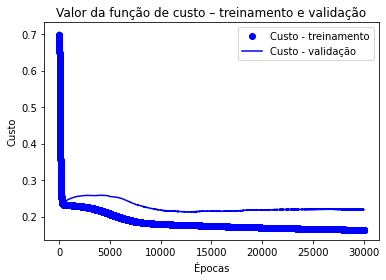

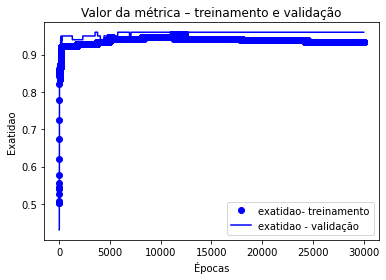

In [9]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores 
custo = history_dict['loss']
acc = history_dict['acc']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_acc']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

Execute a célula a seguir para calcular o custo e a exatidão pra os dados de treinamento, validação e teste.

In [10]:
# Usando o método evaluate calcule o custo e a exatidão e depois apresenta os resultados
custo_e_metricas_train = rna0.evaluate(X_train, Y_train)
custo_e_metricas_val = rna0.evaluate(X_val, Y_val)
custo_e_metricas_test = rna0.evaluate(X_test, Y_test)

print(custo_e_metricas_train)
print(custo_e_metricas_val)
print(custo_e_metricas_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4087 - acc: 0.9300
[0.17971274256706238, 0.9336493015289307]
[0.1831887662410736, 0.9599999785423279]
[0.40870630741119385, 0.9300000071525574]


**Saída esperada:**

    [0.1255700254892286, 0.9526066]
    [0.8738724040985107, 0.94]
    [0.8637536449357868, 0.94]

Execute a célula abaixo para visualizar a fronteira de decisão.

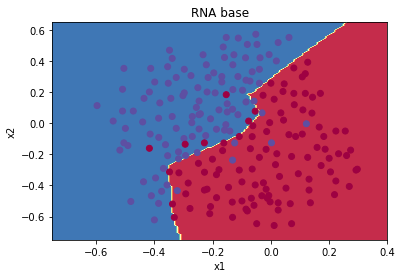

In [11]:
plt.title("RNA base")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(rna0, X_train, Y_train)

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui rapidamente no início depois apresenta uma diminuição lenta e estabiliza em um valor de cerca de 0,12.
- O valor do custo para os dados de validação diminui até por volta da época 8000 e depois aumenta bruscamente e estabiliza em um valor bem alto, o que representa um resultado muito ruim.
- A exatidão obtida para os dados de treinamento é de 95%, para os dados de validação é de 94% e para os dados de teste é de 94%.

Por esses resultados e principalmente pelo gráfico da fronteira de decisão pode-se concluir que essa RNA está obviamente realizando "overfitting" dos dados de trenamento, pois ela está ajustando os ruídos.

Como temos uma RNA que está realizando "overfitting", então vamos implementar técnicas de regularização para reduzir e obter uma RNA que apresenta bom desempenho para os dados de teste. Primeiramente vamos tentar a regularização L2 e depois dropout. 

Essa RNA será utilizada como base para você visualizar o impacto da regularização.

## 4 - Regularização L2

### Exercício #7: Criação da RNA com regularização L2

A regularização L2 é implementada no Keras durante a criação da RNA. Então crie a função build_model_L2, modificando a sua função build_model para incluir a regularização L2. 

Utilize novamente a mesma configuração da RNA, ou seja, 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu;
- Segunda camada: número de neurônios n2, função de ativação ReLu;
- Camada de saída: número de neurônios n3, função de ativação sigmóide;
- Inclua regularização em todas as camadas.

Essa função deve receber como entrada a dimensão dos dados de entrada, os números de neurônios das 3 camadas e o parâmetro de regularização (lamb).

In [0]:
# PARA VOCÊ FAZER: Função para criação da RNA com regularização L2

# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_model_L2(data_shape, n1, n2, n3, lamb):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
    lamb = parâmetro de regularização
       
    Retorna: modelo da rede neural
    """
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 3 linhas)
    model.add(layers.Dense(n1, activation='relu', input_dim=data_shape[0], kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dense(n2, activation='relu', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dense(n3, activation='sigmoid', kernel_regularizer=regularizers.l2(lamb)))
    ### TERMINE AQUI ###
    
    return model

Na célula abaixo configure a sua RNA usando os mesmos parâmetros da RNA base, ou seja, n1 = 40, n2 = 6, n3 = 1. Após criar a RNA utilize o método summary para visualizar a sua rede.

**Importante: nesse exercício o seu objetivo é obter uma RNA que não realiza "overfitting" usando o método de regularização L2. A escolha do  parâmetro de regularização (lambda na célula abaixo) é fundamental para que a RNA apresente um bom desempenho. Teste alguns valores para esse parâmetro até você conseguir um desempenho nos dados de teste semelhante ao obtido nos dados de treinamento e que seja superior ao obtido com a RNA base (sem regularização). A sua nota nesse item desse trabalho depende de você obter uma RNA sem problema de "overfitting" com um bom desempenho nos dados de teste.**

In [13]:
# PARA VOCÊ FAZER: configuração da RNA com regularização L2

# Reinicializa o gerador de números aleatórios
np.random.seed(43)

# Cria rede neural deep learning com regularizaçõa L2 e apresenta sua configuração
#### COMECE AQUI ### (≈3 linhas)
lamb = 0.001
rnaL2 = build_model_L2(data_shape, n1, n2, n3, lamb)
rnaL2.summary()
### TERMINE AQUI ###


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 246       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

    Model: "sequential_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_3 (Dense)              (None, 40)                120       
    _________________________________________________________________
    dense_4 (Dense)              (None, 6)                 246       
    _________________________________________________________________
    dense_5 (Dense)              (None, 1)                 7         
    =================================================================
    Total params: 373
    Trainable params: 373
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #8: Compilação e treinamento da RNA com regularização L2

Agora você vai treinar a sua RNA com regularização L2 usando o método de otimização do gradiente descentende com momento. Assim, na célula abaixo, compile e treine a sua RNA usando os mesmos parâmetros da RNA base, ou seja:

- métrica: exatidão;
- método do gradiente descendente com momento;
- constante beta1 = 0,9;
- decay = 0;
- taxa de aprendizagem = 0,01;
- nesterov = True
- número de épocas = 30.000;
- batch_size = 211. 

**Importante:** Escolha o parâmetro verbose=0 no método fit para evitar de imprimir os resultados das 30.000 épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA com regularização L2 usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otomizador
### COMECE AQUI ### (≈ 2 linhas)
mom = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)
rnaL2.compile(loss='binary_crossentropy', optimizer=mom, metrics=['acc'])
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
historyL2 = rnaL2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=4000, batch_size=211, verbose=0)
### TERMINE AQUI ###

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

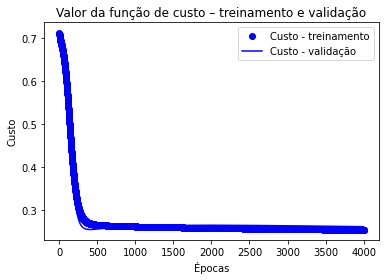

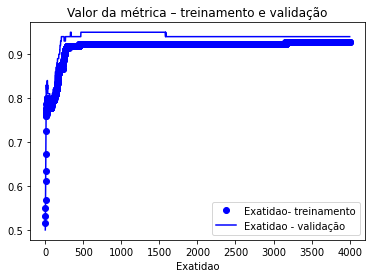

In [15]:
# Salva treinamento na variável history para visualização
history_dictL2 = historyL2.history

# Salva custos, métricas e epocas em vetores 
custoL2 = history_dictL2['loss']
accL2 = history_dictL2['acc']
val_custoL2 = history_dictL2['val_loss']
val_accL2 = history_dictL2['val_acc']

# Cria vetor de épocas
epocasL2 = range(1, len(custoL2) + 1)

# Gráfico dos valores de custo
plt.plot(epocasL2, custoL2, 'bo', label='Custo - treinamento')
plt.plot(epocasL2, val_custoL2, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocasL2, accL2, 'bo', label='Exatidao- treinamento')
plt.plot(epocasL2, val_accL2, 'b', label='Exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Exatidao')
plt.legend()
plt.show()

Execute a célula a seguir para calcular o custo e a exatidão pra os dados de treinamento, validação e teste.

In [16]:
# Usando o método evaluate calcule o custo e a exatidão e depois apresenta os resultados
custo_e_metricas_trainL2 = rnaL2.evaluate(X_train, Y_train)
custo_e_metricas_valL2 = rnaL2.evaluate(X_val, Y_val)
custo_e_metricas_testL2 = rnaL2.evaluate(X_test, Y_test)

print(custo_e_metricas_trainL2)
print(custo_e_metricas_valL2)
print(custo_e_metricas_testL2)

4/4 [==============================] - 0s 2ms/step - loss: 0.3200 - acc: 0.9200
[0.27167031168937683, 0.928909957408905]
[0.2395627647638321, 0.9399999976158142]
[0.32000473141670227, 0.9200000166893005]


**Exemplo de saída esperada:**

    [0.2463980802992509, 0.9478673]
    [0.21228089451789856, 0.96]
    [0.33273865342140196, 0.94]

Execute a célula abaixo para visualizar a fronteira de decisão.

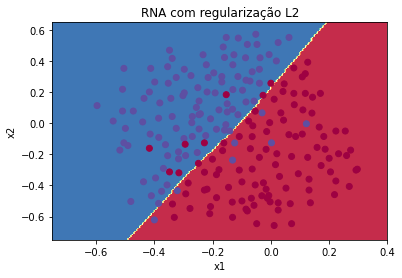

In [17]:
plt.title("RNA com regularização L2")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(rnaL2, X_train, Y_train)  

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deveria observar o seguinte:

- O valor do custo para os dados de treinamento e de validação devem apresentar um comportamento semelhante, ou seja, ambos diminuem com o vanço do treinamento.
- A exatidão obtida para os dados de treinamento, validação teste devem ser semelhantes.

A fronteira de decisão deve estar mais suave e separando de forma mais precisa as duas classes. Podendo-se concluir que não deve estar mais ocorrendo problema de "overfitting" e a exatidão dos dados de teste deve apresentar um resultado melhor do que no caso da RNA base.

**Observações:**

- Lambda é um hiperpâmetro que deve ser ajustado usando os dados de validação.
- Regularização torna a fronteira de decisão mais suave. Mas se lambda for muito grande a RNA pode apresentar problemas de "underfitting".

**O que de fato a regularização está fazendo?**

Regularização L2 se baseia na hipótese de que uma RNA com pesos pequenos é melhor do que um RNA com pesos grandes. Dessa forma, a penalização dos pesos, usando o seu valor ao quadrado na função de custo, faz com que todos os pesos se tornem menores, pois o custo de ter pesos grandes se torna muito alto. O resultado disso é a obtenção de uma RNA cujas saídas variam pouco em função de variações nas entradas.

## 5 - Dropout

Como visto, "dropout" é uma técnica de regularização aplicada a RNAs deep learning. No processo de "dropout" alguns neurônios são desligados em cada iteração. O vídeo a seguir apresenta o processo de "dropout" para uma RNA de 4 camadas.


<center>
<video width="620" height="440" src="dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center> <u> Figura 3 </u>: Aplicação de "dropout" na primeira e terceira camadas escondidas. <br> $1^{st}$ camada: são desligados em média 40% dos neurônios.  $3^{rd}$ camada: são desligados em média 20% dos neurônios (Andre Ng, deeplearning.ai). </center></caption>

Observe que quando deligamos alguns neurônios de fato modificamos a nossa RNA. A ideia do "dropout" é em cada iteração treinarmos uma RNA diferente que usa somente um subconjunto dos neurônios. Com isso, os neurônios ficam menos sensíveis a serem ativados por um único exemplo de treinamento em razão do fato de que esse mesmo neurônio pode ser desligado em outra iteração.


### Exercício #9: Criação da RNA com "dropout"

O "dropout" é implementado no Keras durante a criação da RNA. Então crie a função build_model_Dp, modificando a sua função build_model para incluir o "dropout". 

Utilize novamente a mesma configuração da RNA, ou seja, 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu, com dropout;
- Segunda camada: número de neurônios n2, função de ativação ReLu, com dropout;
- Camada de saída: número de neurônio n3, função de ativação sigmóide, sem dropout.

Essa função deve receber como entrada a dimensão dos dados de entrada, os números de neurônios das 3 camadas e as frações dos neurônios que devem ser desligados na primeira camada (frac1) e na segunda camada (frac2). 

**Observação:** 

- Em razão do número de neurônios da segunda camada dessa RNA ser muito menor do que da primeira camada, pode-se usar frações de desligamento de neurônios diferentes para as duas camadas.

In [0]:
# PARA VOCÊ FAZER: Função para criação da RNA com "dropout"

# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm

def build_model_Dp(data_shape, n1, n2, n3, frac1, frac2):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
    frac1 = fração de neurônios desligados na 1a camada
    frac2 = fração de neurônios desligados na 2a camada
       
    Retorna: modelo da rede neural
    """
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈5 linhas)
    model.add(layers.Dense(n1, activation='relu', input_dim=data_shape[0], kernel_constraint=max_norm(3)))
    model.add(layers.Dropout(frac1))
    model.add(layers.Dense(n2, activation='relu', kernel_constraint=max_norm(3)))
    model.add(layers.Dropout(frac2))
    model.add(layers.Dense(n3, activation='sigmoid'))
    ### TERMINE AQUI ###
    
    return model

Na célula abaixo configure a sua RNA usando os mesmos parâmetros da RNA base, ou seja, n1 = 40, n2 = 6, n3 = 1. Após criar a RNA utilize o método summary para visualizar a sua rede.

**Importante: nesse exercício o seu objetivo é obter uma RNA que não realiza "overfitting" usando o método de "dropout". A escolha das  frações de neurônios desligados nas camadas (frac1 e frac2) é fundamental para que a RNA apresente um bom desempenho. Teste alguns valores para esses parâmetros até você conseguir um desempenho nos dados de teste semelhante ao obtido nos dados de treinamento e que seja superior ao obtido com a RNA base (sem regularização). A sua nota nesse item desse trabalho depende de você obter uma RNA sem problema de "ovrefitting" com um bom desempenho nos dados de teste.**

In [19]:
# PARA VOCÊ FAZER: Função para configuração da RNA com "dropout"

# Reinicializa o gerador de números aleatórios
np.random.seed(43)

# Cria rede neural deep learning com regularizaçõa L2 e apresenta sua configuração
#### COMECE AQUI ### (≈ 4 linhas)
frac1 = 0.4
frac2 = 0.4
rnaDp = build_model_Dp(data_shape, n1, n2, n3, frac1, frac2)
rnaDp.summary()
### TERMINE AQUI ###

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                120       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 246       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

    Model: "sequential_2"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_6 (Dense)              (None, 40)                120       
    _________________________________________________________________
    dropout (Dropout)            (None, 40)                0         
    _________________________________________________________________
    dense_7 (Dense)              (None, 6)                 246       
    _________________________________________________________________
    dropout_1 (Dropout)          (None, 6)                 0         
    _________________________________________________________________
    dense_8 (Dense)              (None, 1)                 7         
    =================================================================
    Total params: 373
    Trainable params: 373
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #10: Compilação e treinamento da RNA com "dropout"

Agora você vai treinar a sua RNA com "dropout" usando novamente o método de otimização do gradiente descentende com momento. Assim, na célula abaixo, compile e treine a sua RNA usando os mesmos hiperparâmetros da RNA base, ou seja:

- métrica: exatidão;
- método do gradiente descendente com momento;
- constante beta1 = 0,9;
- decay = 0;
- nesterov = True;
- taxa de aprendizagem = 0,01;
- número de épocas = 10.000;
- batch_size = 211. 

**Importante:** Escolha o parâmetro verbose=0 no método fit para evitar de imprimir os resultados das 30.000 épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA com dropout usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otomizador
### COMECE AQUI ### (≈ 2 linhas)
mom = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)
rnaDp.compile(loss='binary_crossentropy', optimizer=mom, metrics=['acc'])
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
historyDp = rnaDp.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10000, batch_size=211, verbose=0)
### TERMINE AQUI ###

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

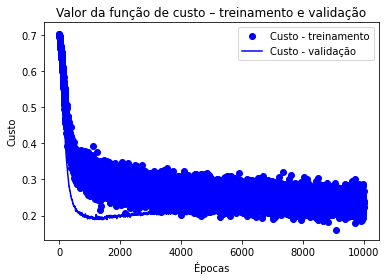

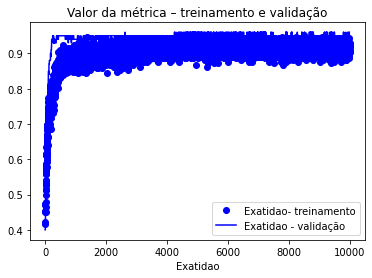

In [21]:
# Salva treinamento na variável history para visualização
history_dictDp = historyDp.history

# Salva custos, métricas e epocas em vetores 
custoDp = history_dictDp['loss']
accDp = history_dictDp['acc']
val_custoDp = history_dictDp['val_loss']
val_accDp = history_dictDp['val_acc']

# Cria vetor de épocas
epocasDp = range(1, len(custoDp) + 1)

# Gráfico dos valores de custo
plt.plot(epocasDp, custoDp, 'bo', label='Custo - treinamento')
plt.plot(epocasDp, val_custoDp, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocasDp, accDp, 'bo', label='Exatidao- treinamento')
plt.plot(epocasDp, val_accDp, 'b', label='Exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Exatidao')
plt.legend()
plt.show()

Execute a célula a seguir para calcular o custo e a exatidão pra os dados de treinamento, validação e teste.

In [22]:
# Usando o método evaluate calcula o custo e a exatidão e depois apresenta os resultados
custo_e_metricas_trainDp = rnaDp.evaluate(X_train, Y_train)
custo_e_metricas_valDp = rnaDp.evaluate(X_val, Y_val)
custo_e_metricas_testDp = rnaDp.evaluate(X_test, Y_test)

print(custo_e_metricas_trainDp)
print(custo_e_metricas_valDp)
print(custo_e_metricas_testDp)

4/4 [==============================] - 0s 2ms/step - loss: 0.3135 - acc: 0.9300
[0.1879645437002182, 0.9383886456489563]
[0.22731637954711914, 0.9399999976158142]
[0.3134860694408417, 0.9300000071525574]


**Exemplo de saída esperada:**

    [0.20544989753108453, 0.93838865]
    [0.26852761328220365, 0.96]
    [0.3201810669898987, 0.93]

Execute a célula abaixo para visualizar a fronteira de decisão.

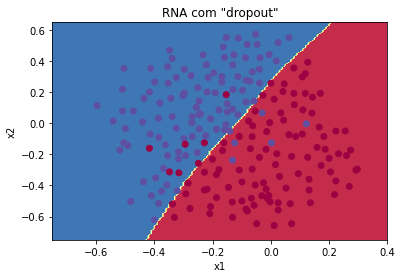

In [23]:
plt.title('RNA com "dropout"')
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(rnaDp, X_train, Y_train)  

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento devem apresentar um comportamento oscilatório em razão do desligamento aleatório de neurônios em cada iteração do treinamento.
- A exatidão obtida para os dados de treinamento, validação teste devem ser semelhantes.

A fronteira de decisão deve estar muito mais suave, mostrando o poder do "dropout" de generalizar a solução. Pode-se concluir que não está mais ocorrendo problema de "overfitting" e a função de custo dos dados de teste deve apresentar um resultado melhor do que no caso da RNA base.

**Observações:**

- A fração de neurônios desligados por iteração (frac) é um hiperpâmetro que deve ser ajustado usando os dados de validação.
- O "dropout" torna a fronteira de decisão mais suave. Mas se fração de neurônios desligados for muito grande a RNA pode apresentar problemas de "underfitting".

**O que de fato o "dropout" está fazendo?**

Uma explicação intuitiva da razão do “dropout” funcionar para diminuir “overfitting” é que ao zerar aleatoriamente as saídas de alguns neurônios das camadas durante o treinamento, é como se a RNA ficasse menor e uma RNA menor tem mais tendência de apresentar problemas de “underfitting” e menos de apresentar problemas de “overfitting”. Outra explicação seria o fato de que o treinamento com “dropout” é distribuído mais uniformemente entre todos os neurônios da RNA, evitando que grupos de neurônios se especializem em dados de treinamento específicos.

## 6 - Conclusão

A conclusão que você deve obter desse trabalho é que regularização é muito eficiente para reduzir problemas de "overfitting" e, assim, obter uma RNA com um desempenho melhor para dados que não foram utilizados no treinamento da rede. Em muitos casos, principalmente quando se tem um número pequeno de exemplos de treinamento, regulariação é fundamental para se obter RNAs com bom desempenho.

Observe que regularização piora o desempenho nos dados de treinamento. Isso ocorre porque a regularização limita a habilidade da rede realizar "overfitting" nos dados de treinamento. Mas na medida em que no final obtém-se um melhor desempenho nos dados de teste o resultado final é melhor.

**O que deve ser lembrado desse trabalho:**
- Regularização ajuda a reduzir "overfitting";
- Regularização resulta em pesos de valores menores;
- Regularização L2 e "dropout" são técnicas eficientes de regularização.
